## Data Preprocessing

In this notebook we explore and prepare the dataset being used for this analysis. The data preparation tasks which will be considered are:

1. Checking for any duplicate rows and removing them.
2. Search for any outliers/incorrect data entries.
3. Perform type conversions.
4. How best to deal with any missing values in the data.
5. Feature scaling.

All of the above tasks will be completed in this notebook. This will ensure that the data is in the correct format and is ready to be used within the analysis. We begin with the imports required for the data preprocessing and looking at the first few rows of the data.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data and look at the first few rows
raw = pd.read_csv("../data/raw/vgsales.csv")
raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


We can see that the data is in order of which game is the most popular on a global level, hence the three most popular games are Wii Sports, Super Mario Bros and Mario Kart Wii. These are all games published by Nintendo and it is clear that the top 5 most popular games are all published by Nintendo.

We can now commence with the data preprocessing tasks outlined above. First we check for any duplicate rows and delete them if there are any.

In [3]:
# Check for any duplicated rows and delete them
num_duplicates = raw.duplicated().sum()
print(f"There are {num_duplicates} duplicated rows.")

There are 0 duplicated rows.


Since there isn't any duplicated data, our first preprocessing task is complete. Next we search for outliers and any incorrect data entries. We begin with the latter of these. An incorrect data entry would be when the year is greater than 2016. This is due to the fact that the data has not been updated since that year and hence it would not make sense for any games to have a relesase year after that date. When identified, the actual release year will be found and the incorrect entries will be updated with the correct values.

In [4]:
# Identify any incorrect entries for the Year
raw[raw["Year"] > 2016]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


After researching, it was found that these games were released on the specified consoles in the years 2009, 2016, 2013 and 2016 respectively. These are updated below.

In [5]:
# Updating the Year with the correct values
updates = {5957:2009, 14390:2016, 16241:2013, 16438:2016}
for i in updates.keys():
    raw.iloc[i,3] = updates[i]
    
if raw[raw["Year"] > 2016].any().sum() == 0:
    print("All years are up to date!")
else:
    print("There are still incorrect entries.")

All years are up to date!


Continuing with the next part of the task, we will determine if any outliers exist in the data. To do this we will examine some summary statistics and create box plots for the numeric sales features that are in the data set. The reason for a box plot instead of a histogram to look for outliers is the fact there aren't many data points in the dataset and a histogram could be misleading since the game with the most global sales (Wii Sports, as seen above) had numerous more sales than the second game with the most sales.

In [6]:
# Summary statistics of the numeric sales features
numeric_sales_features = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
sales_data = raw[numeric_sales_features]
sales_data.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


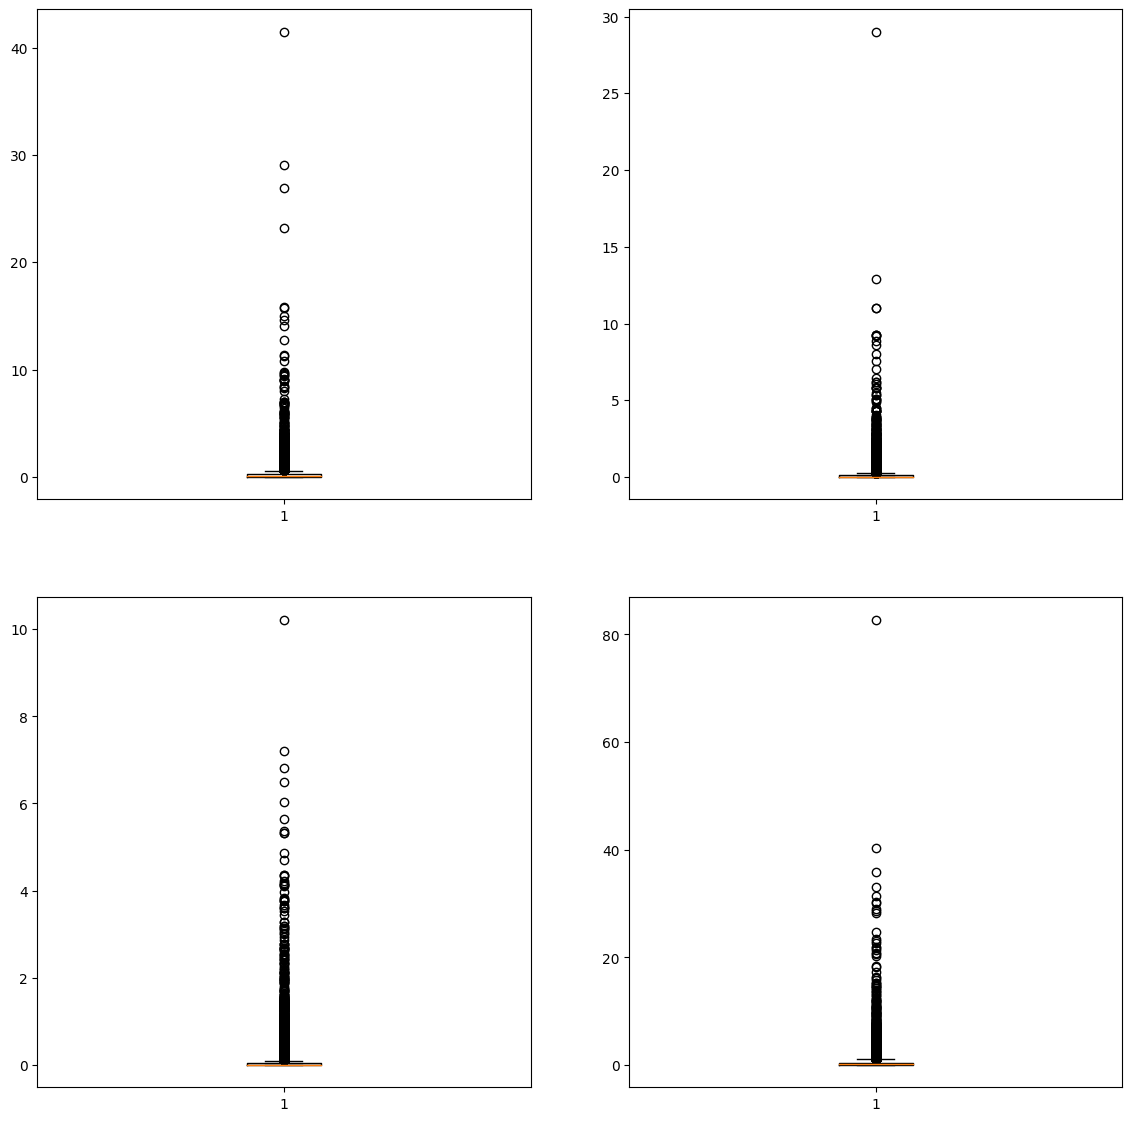

In [14]:
# Box plots
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(14,14))

ax[0][0].boxplot(sales_data["NA_Sales"])
ax[0][1].boxplot(sales_data["EU_Sales"])
ax[1][0].boxplot(sales_data["JP_Sales"])
ax[1][1].boxplot(sales_data["Global_Sales"])
plt.show()

It can be seen that there are missing values for both the Year and Publisher features. Year has 271 missing values whilst Publisher has 58. Another thing to note is that this dataset has not been updated since 2016. This means we need to check for any incorrect entries in the dataset and update them with the correct values. We begin by focusing on the Year feature.

In the step below, all missing values for the Year feature are imputed using the median year value. The median is chosen as this is a more robust metric of location than the mean.

In [35]:
# Imputing the missing Year value with the median year
year_median = raw["Year"].median(skipna=True)
raw["Year"] = raw["Year"].fillna(year_median)
missing_vals = raw["Year"].isnull().sum()

print(f"There are {missing_vals} missing values for the Year feature.")

There are 0 missing values for the Year feature.


Now we search for any incorrect entries for the Year. These are any values in the dataset where Year is greater than 2016. When identified, the actual release year will be found and the incorrect entries will be updated with the correct values.

In [36]:
# Identify any incorrect entries for the Year
raw[raw["Year"] > 2016]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


The year is now correct for each video game and there are no longer any missing values for this feature. This is now complete and does not require anymore preprocessing. 

Next the Publisher feature will be prepared for analysis. Only a small percentage of values are missing for this feature, also this feature will not play much of a role within the analysis being completed. For these reasons, any missing values will be imputed with the value "Unknown". An alternative to this would be to remove the rows containing missing values. However, imputing the missing values with "Unknown" means we get to keep more data and can perform a more granular analysis.

In [38]:
# Impute "Unknown" for missing values in the Publisher feature
raw['Publisher'] = raw['Publisher'].fillna('Unknown')

All missing values have now been changed and the data is complete. 

Next we investigate each data type and update any which are incorrect.

In [39]:
# Looking at data types
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [25]:
# Change Year to an integer value instead of a decimal
raw['Year'] = raw['Year'].astype('int')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


We conclude the data exploration by looking at some basic descriptive statistics of the numeric features in the dataset. These can be seen below.

It can be seen that the average year that a video game was released in the dataset is 2006 which suggests that the games in the dataset are fairly old. We can also see that the region where average sales are the highest is North America, this is followed by Europe but the difference between these averages are rather significant. Globally, on average, a video game has approximately 537,000 sales. 

The oldest game in the dataset was released in 1980 and the latest game released was in 2016. This means we are investigating a variety of different video games from different periods in time. 

In [42]:
raw.to_csv("../data/processed/vgsales_processed.csv", index=False)